In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sleep_data_path= "C:\\Users\\larab\\OneDrive\\Desktop\\project_one\\Sleep_health_and_lifestyle_dataset.csv"

# Read the sleep data file
sleep_data= pd.read_csv(sleep_data_path, index_col="Person ID")

# Display the data table for preview
sleep_data.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


In [2]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [3]:
#Rename the various values that equal normal in the table to standarize them under the name "normal"
sleep_data.loc[sleep_data['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'
sleep_data.loc[sleep_data['Sleep Disorder'] == 'None', 'Sleep Disorder'] = 'Normal'


# Display the modified DataFrame
sleep_data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# Count the sleep disorder values and reset the index
sd_count_df = sleep_data.groupby(['Sleep Disorder' ] ).size().reset_index(name='Counts')
sd_count_df


,Sleep Disorder,Counts
0,Insomnia,77
1,Normal,219
2,Sleep Apnea,78


In [5]:
#Use groupby to count the number of sleep disorders for each gender and reset the index, then calculate the percentage
sleep_gender_count = sleep_data.groupby(['Sleep Disorder','Gender']).size().reset_index(name='Counts')

grouped_data = sleep_gender_count.groupby(['Sleep Disorder', 'Gender'])['Counts'].sum().unstack()
total_count = sleep_data.shape[0]
sleep_gender_count['Percentage'] = (sleep_gender_count['Counts'] / total_count) * 100
sleep_gender_count


,Sleep Disorder,Gender,Counts,Percentage
0,Insomnia,Female,36,9.625668
1,Insomnia,Male,41,10.962567
2,Normal,Female,82,21.925134
3,Normal,Male,137,36.631016
4,Sleep Apnea,Female,67,17.914439
5,Sleep Apnea,Male,11,2.941176


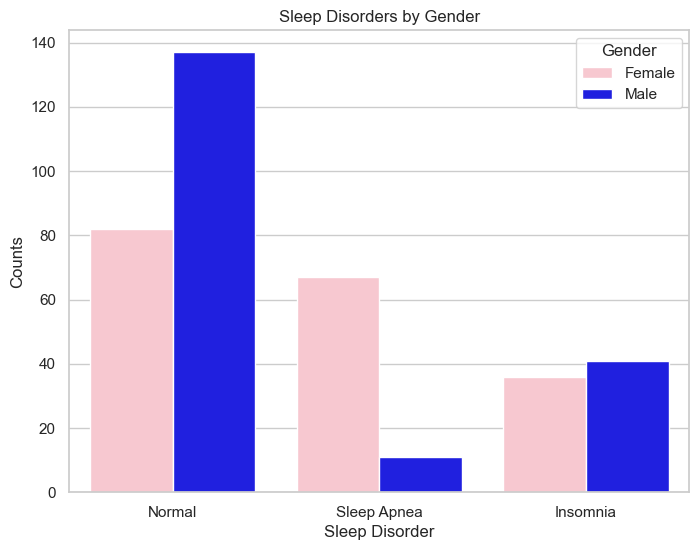

In [6]:
# Define the desired order of Sleep Disorders
desired_order = ['Normal','Sleep Apnea', 'Insomnia']

# Define custom colors for each bar
custom_colors = ['pink', 'blue', 'pink', 'lightskyblue', 'pink', 'blue']

# Create a bar graph using Seaborn with the specified order
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x='Sleep Disorder', y='Counts', hue='Gender', data=sleep_gender_count, palette=custom_colors, order=desired_order)

# Set the plot title
plt.title('Sleep Disorders by Gender')

# Show the legend
plt.legend(title='Gender', loc='upper right')

# Save the figure
plt.savefig("sleep_gender.png")

In [7]:
#Get an overview of the values in the dataset, focusing on the range and mean in the 'age' column
sleep_data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
# Group by 'Age' and 'Gender', count occurrences, and reset the index
sleep_gender_age_count = sleep_data.groupby(['Age', 'Gender']).size().reset_index(name='Counts')


# Filter by age (< 50) and gender (male or female)
filtered_data = sleep_gender_age_count[
    (sleep_gender_age_count['Age'] < 50)]

mfiltered_data = filtered_data[filtered_data['Gender'].isin(['Male'])].count()
fefiltered_data = filtered_data[filtered_data['Gender'].isin(['Female'])].count()

# Filter by age (> 50) and gender (male or female)
old_filtered_data = sleep_gender_age_count[
    (sleep_gender_age_count['Age'] > 50)]

mfiltered_old_data = old_filtered_data[old_filtered_data['Gender'].isin(['Male'])].count()
fefiltered_old_data = old_filtered_data[old_filtered_data['Gender'].isin(['Female'])].count()

# Assemble the results into a single summary DataFrame
summary_filtered = pd.DataFrame({"Male < 50":mfiltered_data, 
                            "Female < 50":fefiltered_data, 
                           "Male > 50":mfiltered_old_data, 
                           "Female > 50":fefiltered_old_data})
summary_filtered

,Male < 50,Female < 50,Male > 50,Female > 50
Age,19,17,0,9
Gender,19,17,0,9
Counts,19,17,0,9


In [9]:
# Group by 'Sleep Disorder' and 'Age', count occurrences, and reset the index, then calculate the percentage
pcount_sleep_age_df = sleep_data.groupby([ 'Sleep Disorder','Age' ] ).size().reset_index(name='Counts')
total_count = sleep_data.shape[0]
pcount_sleep_age_df['Percentage'] = (pcount_sleep_age_df['Counts'] / total_count) * 100
pcount_sleep_age_df.head(5)

,Sleep Disorder,Age,Counts,Percentage
0,Insomnia,28,1,0.267380
1,Insomnia,29,2,0.534759
2,Insomnia,30,1,0.267380
3,Insomnia,33,1,0.267380
4,Insomnia,36,2,0.534759


In [10]:
#Calculate the mean and median of the age for each sleep disorder
mean = sleep_data['Age'].groupby(sleep_data['Sleep Disorder']).mean()
median = sleep_data['Age'].groupby(sleep_data['Sleep Disorder']).median()

# Assemble the results into a single summary DataFrame
summary_mean= pd.DataFrame({" Mean Age": mean, "Median Age": median})
summary_mean

,Mean Age,Median Age
Sleep Disorder,,
Insomnia,43.519481,44.0
Normal,39.036530,38.0
Sleep Apnea,49.705128,50.0


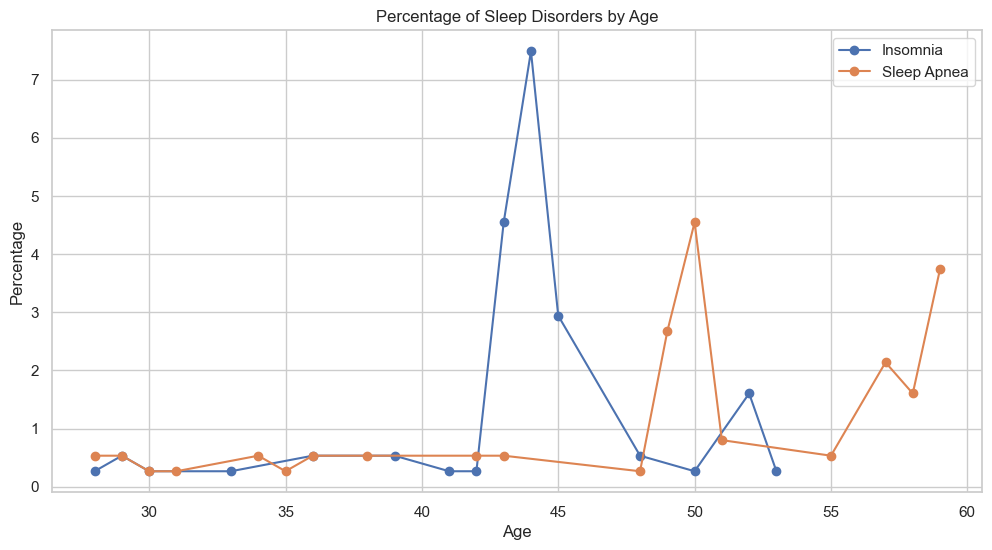

<Figure size 640x480 with 0 Axes>

In [11]:
# Create a line plot without the "Normal" line
plt.figure(figsize=(12, 6))  # Set the figure size

# List of sleep disorders to include in the plot
sleep_disorders_to_include = ['Insomnia', 'Sleep Apnea']

# Plot lines for each sleep disorder in the list
for disorder in sleep_disorders_to_include:
    data = pcount_sleep_age_df[pcount_sleep_age_df['Sleep Disorder'] == disorder]
    plt.plot(data['Age'], data['Percentage'], marker='o', label=disorder)

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Percentage of Sleep Disorders by Age')
plt.legend()

plt.grid(True)  # Add grid lines

plt.show()
# Save the figure
plt.savefig("slp_gender.png")

In [12]:
# Group by 'Sleep Disorder' and 'BMI Category', count occurrences, and reset the index
sleep_bmi_count = sleep_data.groupby(['Sleep Disorder','BMI Category' ] ).size().reset_index(name='Counts')
sleep_bmi_count

,Sleep Disorder,BMI Category,Counts
0,Insomnia,Normal,9
1,Insomnia,Obese,4
2,Insomnia,Overweight,64
3,Normal,Normal,200
4,Normal,Overweight,19
5,Sleep Apnea,Normal,7
6,Sleep Apnea,Obese,6
7,Sleep Apnea,Overweight,65


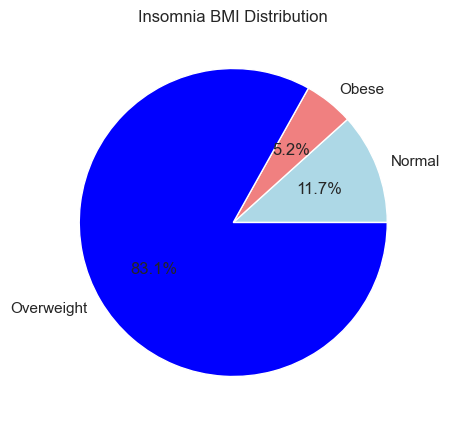

In [13]:
# Filter the data for the "Insomnia" category
insomnia_data = sleep_bmi_count[sleep_bmi_count['Sleep Disorder'] == 'Insomnia']

# Check if there is data for "Insomnia"
if not insomnia_data.empty:
    # Define custom colors for the slices
    custom_colors = ['lightblue', 'lightcoral', 'blue']

    # Create a pie chart for the "Insomnia" category
    plt.figure(figsize=(5, 5))  # Set the figure size
    plt.pie(insomnia_data['Counts'], labels=insomnia_data['BMI Category'], autopct='%1.1f%%', colors=custom_colors)
    plt.title('Insomnia BMI Distribution')
    plt.show()

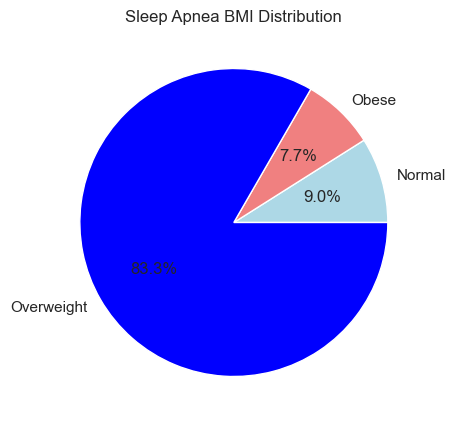

In [14]:
# Filter the data for the "Sleep Apnea" category
sleep_apnea_data = sleep_bmi_count[sleep_bmi_count['Sleep Disorder'] == 'Sleep Apnea']

# Check if there is data for "Sleep Apnea"
if not sleep_apnea_data.empty:
    # Define custom colors for the slices
    custom_colors =['lightblue', 'lightcoral', 'blue']

    # Create a pie chart for the "Sleep Apnea" category
    plt.figure(figsize=(5, 5))  # Set the figure size
    plt.pie(sleep_apnea_data['Counts'], labels=sleep_apnea_data['BMI Category'], autopct='%1.1f%%', colors=custom_colors)
    plt.title('Sleep Apnea BMI Distribution')
    plt.show()
    


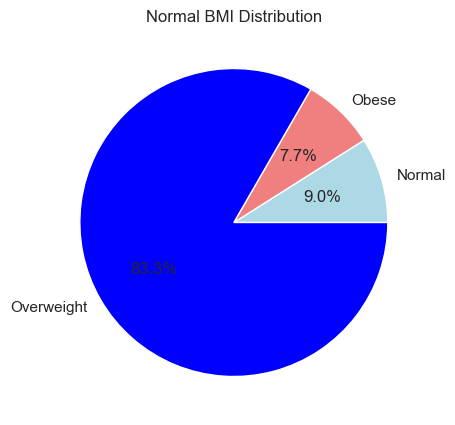

In [15]:
# Filter the data for the "Normal" category
sleep_apnea_data = sleep_bmi_count[sleep_bmi_count['Sleep Disorder'] == 'Sleep Apnea']

# Check if there is data for "Normal"
if not sleep_apnea_data.empty:
    # Define custom colors for the slices
    custom_colors =['lightblue', 'lightcoral', 'blue']

    # Create a pie chart for the "Normal" category
    plt.figure(figsize=(5, 5))  # Set the figure size
    plt.pie(sleep_apnea_data['Counts'], labels=sleep_apnea_data['BMI Category'], autopct='%1.1f%%', colors=custom_colors)
    plt.title('Normal BMI Distribution')
    plt.show()
    

In [16]:
# Group by 'Quality of Sleep' and 'Stress Level', count occurrences, and reset the index, then calculate percentage
sl_stress_count = sleep_data.groupby(['Quality of Sleep','Stress Level']).size().reset_index(name='Counts')

total_count = sleep_data.shape[0]
sl_stress_count['Percentage'] = (sl_stress_count['Counts'] / total_count) * 100

sl_stress_count.head(5)


,Quality of Sleep,Stress Level,Counts,Percentage
0,4,8,5,1.336898
1,5,7,7,1.871658
2,6,6,4,1.069519
3,6,7,36,9.625668
4,6,8,65,17.379679


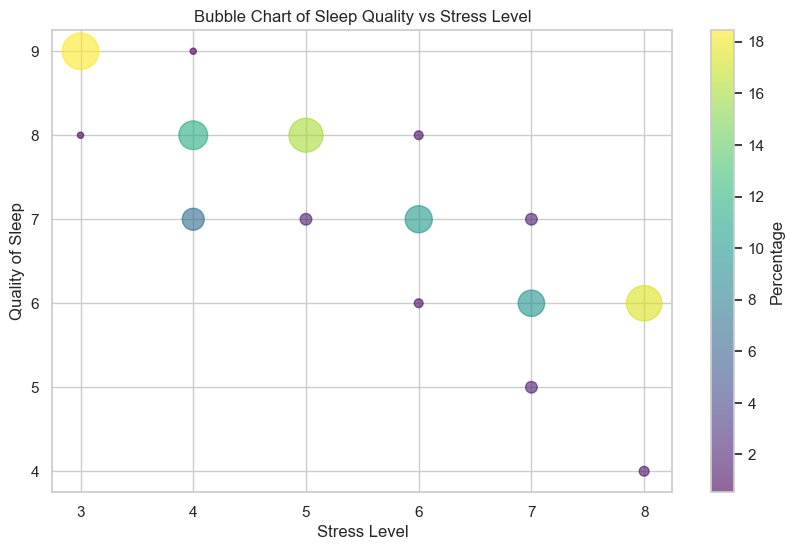

In [17]:
# Create a bubble chart for the sleep quality vs stress level
x = sl_stress_count['Stress Level']
y = sl_stress_count['Quality of Sleep']
sizes = sl_stress_count['Counts'] * 10  # Scale up the counts for better visibility
percentages = sl_stress_count['Percentage']


plt.figure(figsize=(10, 6))  # Adjust the size of your figure
scatter = plt.scatter(x, y, s=sizes, alpha=0.6, c=percentages, cmap='viridis')

# Add labels and title
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Bubble Chart of Sleep Quality vs Stress Level')

# Create a colorbar
plt.colorbar(scatter, label='Percentage')

# Show gridlines
plt.grid(True)

# Show the plot
plt.show()


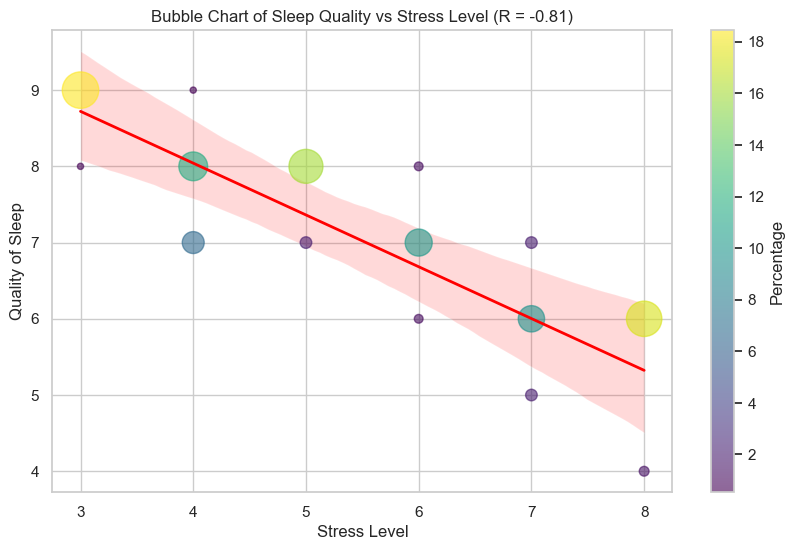

In [18]:
# Repeat the bubble chart for the sleep quality vs stress level from above
x = sl_stress_count['Stress Level']
y = sl_stress_count['Quality of Sleep']
sizes = sl_stress_count['Counts'] * 10  # Scale up the counts for better visibility
percentages = sl_stress_count['Percentage']
plt.figure(figsize=(10, 6))  # Adjust the size of your figure

# Perform linear regression
reg_plot = sns.regplot(x=x, y=y, scatter=False, color='red', line_kws={"linewidth": 2})

# Calculate the R-value
correlation_coefficient, _ = stats.pearsonr(x, y)

# Add labels and title with the R-value
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title(f'Bubble Chart of Sleep Quality vs Stress Level (R = {correlation_coefficient:.2f})')

# Create a colorbar
scatter = plt.scatter(x, y, s=sizes, alpha=0.6, c=percentages, cmap='viridis')
plt.colorbar(scatter, label='Percentage')

# Show gridlines
plt.grid(True)

# Show the plot
plt.show()
